reference:
> [麻雀优化算法（Sparrow Search Algorithm）](https://blog.csdn.net/qq_39297053/article/details/137440565)

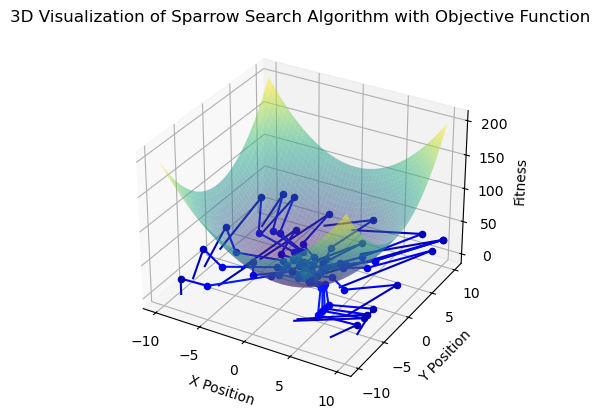

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
# 定义目标函数
def objective_function(x, y):
    return x**2 + y**2
 
# 初始化麻雀群体
def initialize_sparrows(population_size, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (population_size, 2))
    return population
 
# 计算适应度
def calculate_fitness(population):
    return np.array([objective_function(ind[0], ind[1]) for ind in population])
 
# 更新麻雀位置
def update_position(population, best_idx, worst_idx, bounds, avoid_predator=False):
    r1, r2, r3 = np.random.random(), np.random.random(), np.random.random()
    new_population = np.copy(population)
    for i in range(len(population)):
        if avoid_predator:
            # 躲避天敌
            new_population[i] += r3 * (population[i] - population[worst_idx])
        elif i == best_idx:
            # 领导者
            new_population[i] -= r1 * abs(new_population[i] - population[best_idx])
        else:
            # 追随者
            new_population[i] += r2 * (population[best_idx] - population[i])
        
        # 确保位置在界限内
        new_population[i] = np.clip(new_population[i], bounds[0], bounds[1])
    return new_population
 
# SSA算法主函数
def sparrow_search_algorithm(objective_function, bounds, population_size=20, iterations=100):
    population = initialize_sparrows(population_size, bounds)
    fitness_history = []
    position_history = []  # 用于存储每次迭代的位置
 
    for iteration in range(iterations):
        fitness = calculate_fitness(population)
        best_idx = np.argmin(fitness)
        worst_idx = np.argmax(fitness)
        fitness_history.append(fitness[best_idx])
        position_history.append(np.copy(population))  # 存储当前位置
 
        # 每20次迭代，麻雀躲避天敌
        avoid_predator = iteration % 20 == 0
        population = update_position(population, best_idx, worst_idx, bounds, avoid_predator)
 
    return position_history, fitness_history
 
# 参数
bounds = [-10, 10]
population_size = 20
iterations = 20
 
# 运行算法
position_history, fitness_history = sparrow_search_algorithm(objective_function, bounds, population_size, iterations)
 
# 函数表面图
x = np.linspace(bounds[0], bounds[1], 50)
y = np.linspace(bounds[0], bounds[1], 50)
x, y = np.meshgrid(x, y)
z = objective_function(x, y)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')
 
# 麻雀位置和训练路径
for i in range(1, iterations):
    # 使用浮点数确保正确的颜色映射
    color = plt.cm.jet(float(i) / iterations)
    for j in range(population_size):
        # 绘制线段
        ax.plot([position_history[i-1][j][0], position_history[i][j][0]],
                [position_history[i-1][j][1], position_history[i][j][1]],
                [fitness_history[i-1], fitness_history[i]],
                color=color)
        # 绘制点
        ax.scatter(position_history[i][j][0], position_history[i][j][1], fitness_history[i], color=color, marker='o')
 
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Fitness')
plt.title('3D Visualization of Sparrow Search Algorithm with Objective Function')
plt.show()